# Logistic Regression

*Author: Dr. Vasile Rus (vrus@memphis.edu)*

So far, we have looked at two broad kinds of supervised learning, classification and regression.
Classification predicts a class label for an observation (i.e., a row of the dataframe) and regression predicts a numeric value for an observation.

Logistic regression is a kind of regression that is primarily used for classification, particularly binary classification.
It does this by predicting the **probability** (technically the log-odds) of the positive class assigned label `1`.
If the probability is above a threshold, e.g .50, then this predicted numeric value is interpreted as a classification of `1`.
Otherwise, the predicted numeric value is interpreted as a classification of `0`.
So **logistic regression predicts a numeric probability that we convert into a classification.**

Logistic regression is widely used in data science classification tasks, for example to:

* categorize a person as having diabetes or not having diabetes
* categorize an incoming email as spam or not spam

Because logistic regression is also regression, it captures the relationship between an outcome/dependent variable and the predictor/independent variables in a similar way to linear regression.
The major difference is that the coefficients in logistic regression can be interpreted probabilistically, so that we can say how much more likely a predictor variable makes a positive classification.

The most common kind of logistic regression is binary logistic regression, but it is possible to have:

* Binary/binomial logistic regression
* Multiclass/Multinomial logistic regression
* Ordinal logistic regression (there is an order among the categories)

<!-- NOTE: I think this has been covered already, except maybe the hard/soft distinction -->
<!-- **What is classification?**

A classification/categorization task is about placing an object, e.g., a patient, into one of many categories, e.g. diseases, based on some characteristics of that object, e.g, patient’s symptoms.

Depending on the number of classes/categories, classification tasks are called:
* Binary/binomial vs. multi-class/multinomial classification. The simplest form of classification is binary classification, e.g., spam vs. not-spam email.
* Multinomial classification. An example is categorizing birds into one of many species.

**Hard classification vs. soft classification**
* Hard classification: The object is placed into one and only one category out of many
* Soft classification: the object is assigned to more than one category with some measure indicating the confidence of that object belonging to those categories

In this notebook, we focus on binary, hard classification tasks. -->

## Mathematical Foundations of Logistic Regression for Binary Classification

We briefly review in this section the mathematical formulation of logistic regression for binary classification problems. 
That is, the predicted categories are just two (say, 1 or 0) and each object or instance belongs to one and only one category. 

Logistic regression expresses the relationship between the output variable, also called dependent variable, and the predictors, also called independent variables or features, in a similar way to linear regression with an additional twist. 
The additional twist is necessary in order to transform the typical continuous value of linear regression onto a categorical value (0 or 1).

**From Linear Regression to Logistic Regression**

Let us review first the basics of linear regression and then discuss how to transform the mathematical formulation of linear regression such that the outcome is categorical. 

In a typical linear regression equation, the output variable $Y$ is related to $n$ predictor variables $X_j$ ($j=1,n$) using the following linear relation, where the output $Y$ is a linear combination of the predictors $X_j$ with corresponding weights (or coefficients) $\beta_{j}$:

$$Y = {\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}$$

In linear regression, the output $Y$ has continuous values between $-\inf$ and $+\inf$. In order to map such output values to just 0 and 1, we need to apply the sigmoid or logistic function.

$$\sigma (t) = \frac{1}{1 + e^{-t}}$$

A graphical representation of the sigmoid or logistic function is shown below (from Wikipedia). 
The important part is that the output values are in the interval $(0,1)$ which is close to our goal of just predicted values 1 or 0.

<!-- 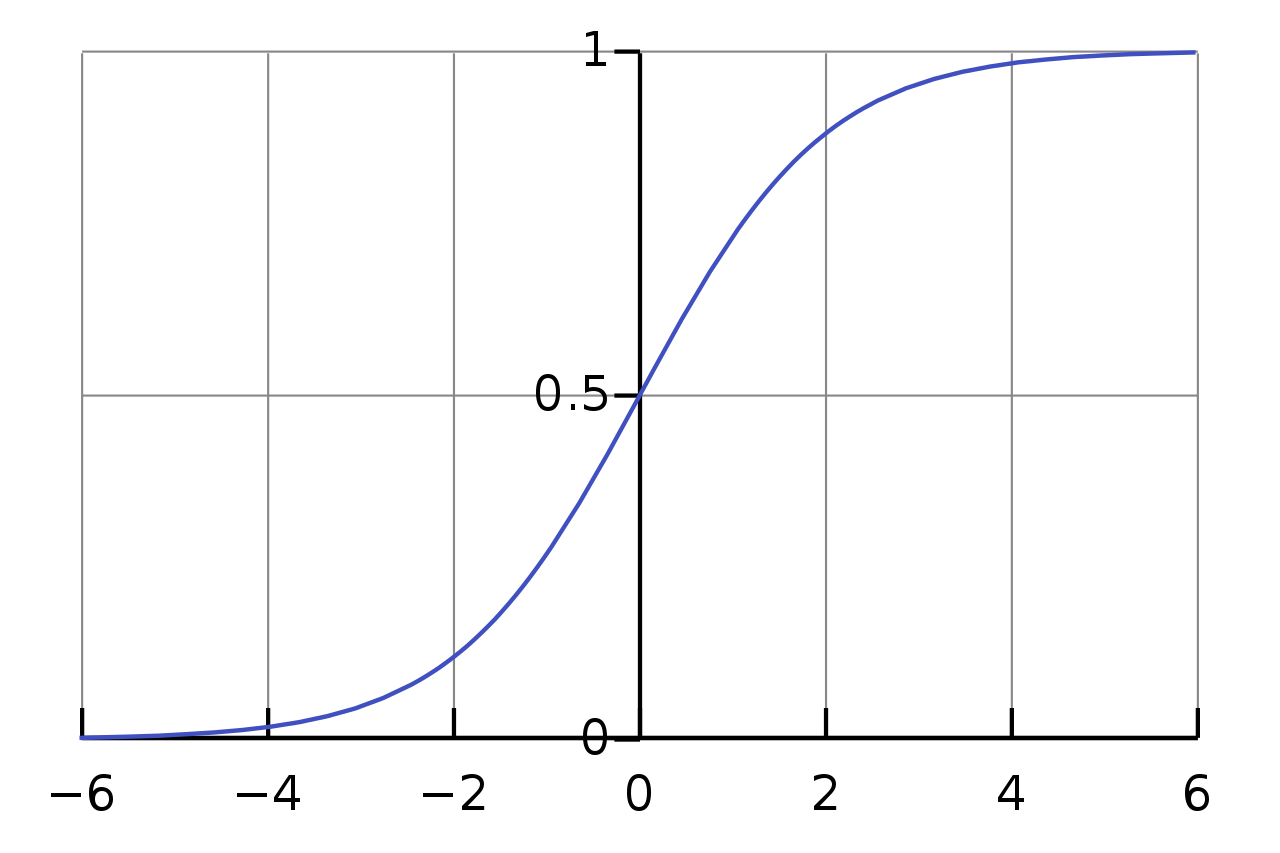 -->
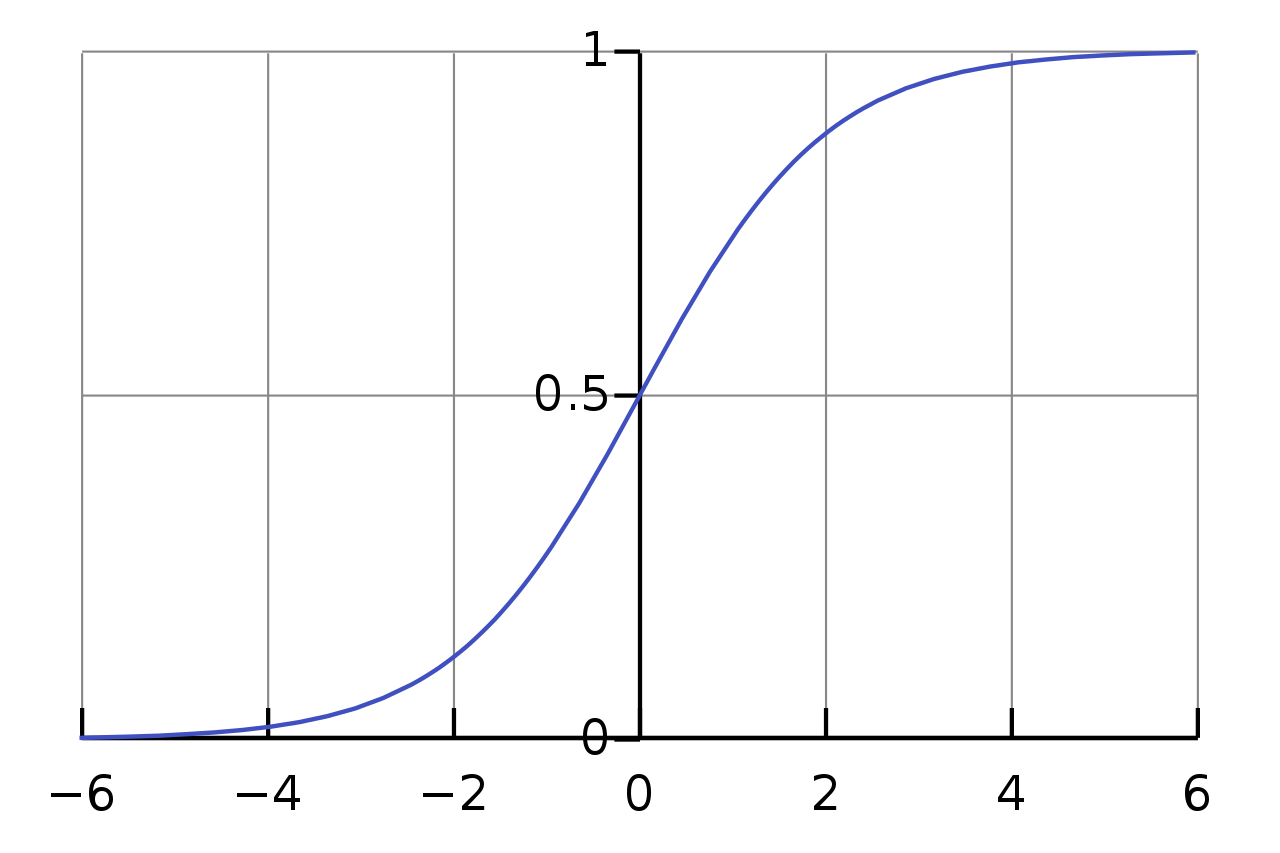

When applied to the $Y = {\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}$ from linear regression we get the following formulation for logistic regression:
$$\frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}}}$$

The net effect is that the the typical linear regression output values ranging from $-\inf$ and $+\inf$ are now bound to $(0,1)$, which is typical for probabilities. That is, the above formulation can be interpreted as estimating the probability of instance $X$ (described by all predictors $X_j$) belonging to class 1. 

$$ P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

The probability of class 0 is then:

$$ P( Y=0 | X ) = 1 - P( Y=1 | X ) $$

Values close to 0 are deemed to belong to class 0 and values close to 1 are deemed to belong to class 1, thus resulting in a categorical output which is what we intend in logistic regression.

<!-- NOTE: This is great but I think too intense at this point. The problem is that we haven't done the background in probability it seems to require. -->

<!-- # Supervised Training for Logistic Regression

In order to apply logistic regression to a particular problem, e.g., email spam classification, we need to train a logistic regression model using a supervised method, i.e., we need a training dataset consisting of expert-labeled instances of the objects we want to classify and their correct categories as judged by human experts.

During training, the best set of predictor variable weights or coefficients $\beta_{j}$ are estimated based on the training data. It is beyond the scope of this notebook to detail the details of the training process. We will just note that the objective is to find the weights that maximize how well the predicted categories match the true, actual/expert-labelled categories for all instances.

Mathematically, the goal of the training is to maximize the following expression that captures how well a set of the values of the coefficients $\beta_{j}$, i.e., a logistic model, predicts the actual classes for all training instances T:

$$Likelihood(T) = \prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The expression is called the likelihood of the training data $T$ and is defined as the product of the estimated probabilities of each training example $X_j$ given a model defined by the weights/coefficients $\beta_{j}$. For computational reasons (e.g., it is easier to work with sum of small numbers than with products of such small numbers, i.e., probabilities values between 0 and 1), we maximize the log of likelihood:

$$Log-Likelihood(T) = log (\prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})) = \sum _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The probability of an instance labeled with class $Y_i$ is in compact form: 

$$ P(Y_{j}|X_{j}; \beta_{j}) = P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j} (1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}$$

Based on this expression of the probability of each instance, we can rewrite the log-likelihood as:

$$Log-Likelihood(T) = \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} + \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

During training this expression is maximized. It can be maximized by minimizing its opposite which we can call the cost function or optimization objective for logistic regression:

$$cost-function = - Log-Likelihood(T) = - \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} - \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

Finding the weights or coefficients $beta_{j}$ that minimize the cost function can be done using various algorithms such as gradient descent. -->

# Interpreting the Coefficients in Logistic Regression

One of the best ways to interpret the coefficients in logistic regression is to transform it back into a linear regression whose coefficients are easier to interpret. 
From the earlier formulation, we know that:

$$ Y =  P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

Applying a log function on both sides, we get:

$$ log \frac{P ( Y=1 | X )}{1- P( Y=1 | X )} = \sum \limits _{j=1} ^{p}  X_{j}{\beta}_{j} $$

On the left-hand of the above expression we have the log odds defined as the ratio of the probability of class 1 versus the probability of class 0. Indeed, this expression $\frac{P ( Y=1 | X )}{1- P( Y=1 | X )}$ is the odds because $1- P( Y=1 | X )$ is the probability of class 0, i.e., $P( Y=0 | X )$.

Therefore, we conclude that the log odds are a linear regression of the predictor variables weighted by the coefficients $\beta_{j}$. Each such coefficient therefore indicates a change in the log odds when the corresponding predictor changes with a unit (in the case of numerical predictors).

You may feel more comfortable with probabilities than odds, but you have probably seen odds expressed frequently in the context of sports.
Here are some examples:

- 1 to 1 means 50% probability of winning
- 2 to 1 means 67% probability of winning
- 3 to 1 means 75% probability of winning
- 4 to 1 means 80% probability of winning

Odds are just the probability of success divided by the probability of failure.
For example 75% probability of winning means 25% probability of losing, and $.75/.25=3$, and we say the odds are 3 to 1.

Because log odds are not intuitive (for most people), it is common to interpret the coefficients of logistic regression as odds.
When a log odds coefficient has been converted to odds (using $e^\beta$), a coefficient of 1.5 means the positive class is 1.5 times more likely given a unit increase in the variable.

# Peformance Evaluation 

Performance evaluation for logistic regression is  the same as for other classification methods.
The typical performance metrics for classifiers are accuracy, precision, and recall. 
We previously talked about these, but we did not focus much on precision, so let's clarify that.

In some of our previous classification examples, there are only two classes that are equally likely (each is 50% of the data).
When classes are equally likely, we say they are **balanced**.
If our classifier is correct 60% of the time with two balanced classes, we know it is 10% better than chance.

However, sometimes things are very unbalanced.
Suppose we're trying to detect a rare disease that occurs once in 10,000 people.
In this case, a classifier that always predicts "no disease" will be correct 99.99% of the time.
This is because the **true negatives** in the data are so much greater than the **true positives**
Because the metrics of accuracy and specificity use true negatives, they can be somewhat misleading when classes are imbalanced.

In contrast, precision and recall don't use true negatives at all (see the figure below).
This makes them behave more consistently in both balanced and imbalance data.
For these reasons, precision, recall, and their combination F1 (also called f-measure) are very popular in machine learning and data science.

<!-- 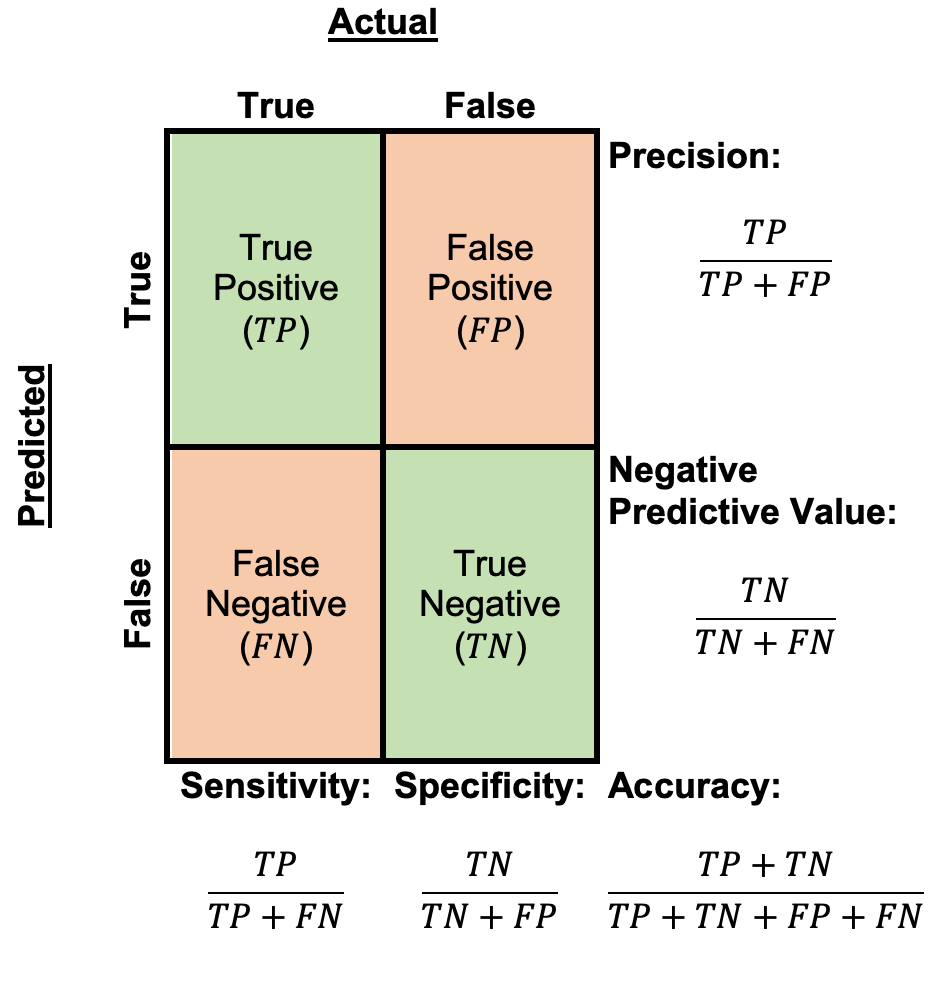 -->
<div>
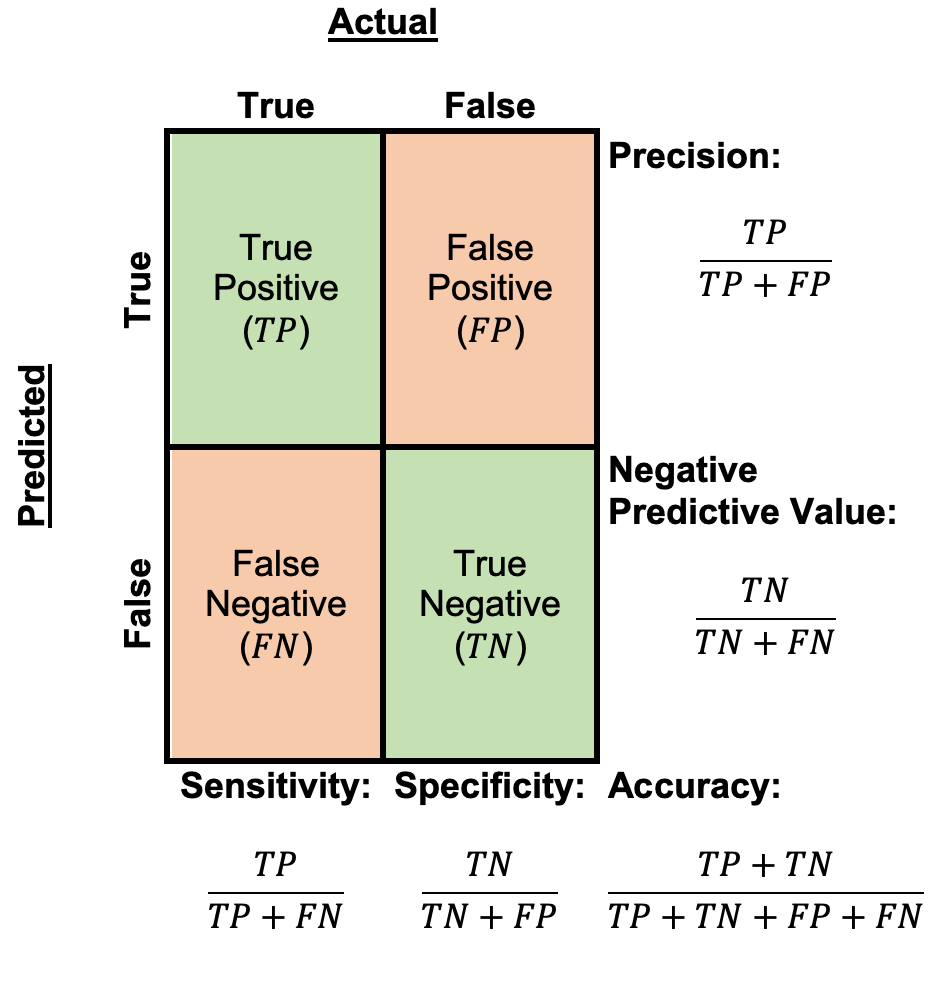
</div>

<!-- NOTE: this became redundant with Tasha's KNN classification notebook. I modified to amplify precision, which she did not focus much on. -->
<!-- happens, it is easy

These are typical derived by compared the predicted output to the golden or actual output/categories in the expert labelled dataset.

For a binary classification case, we denote the category 1 as the positive category and category 0 as the negative category. Using this new terminology, When comparing the predicted categories to the actual categories we may end up with the following cases:
* True Positives (TP): instances predicted as belonging to the positive category and which in fact do belong to the positive category
* True Negatives (TN): instances predicted as belonging to the negative category and which in fact do belong to the negative category
* False Positives (FP): instances predicted as belonging to the positive category and which in fact do belong to the negative category
* False Negatives (FN): instances predicted as belonging to the negative category and which in fact do belong to the positive category

From these categories, we define the following metrics:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

Classfication methods that have a high accuracy are preferred in general although  -->
In some cases, maximizing precision or recall may be preferred. 
For instance, a high recall is highly recommended when making medical diagnosis since it is preferrable to err on mis-diagnosing someone as having cancer as opposed to missing someone who indeed has cancer, i.e., the method should try not to miss anyone who may indeed have cancer. 
This idea is sometimes referred to as **cost-sensitive classification**, because there may be an asymmetric cost toward making one kind of mistake vs. another (i.e. FN vs. FP).

In general, there is a trade-off between precision and recall. 
If precision is high then recall is low and vice versa. 
Total recall (100% recall) is achievable by always predicting the positive class, i.e., label all instances as positive, in which case precision will be very low.

In the case of logistic regression, you can imagine that we changed the threshold from .50 to a higher value like .90.
This would make many observations previously classified as 1 now classified as 0.
What was left of 1 would be very likely to be 1, since we are 90% confident (high precision).
However, we would have lost all of the 1s between 50-90% (low recall).

# Example: Diabetes or no Diabetes

The type of dataset and problem is a classic supervised binary classification. 
Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.


## The Pima Indians Dataset

The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes, and for this reason they have been subject of many studies.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The dataset includes data from 768 women with 8 characteristics, in particular:

| Variable | Type  | Description                                                              |
|----------|-------|:--------------------------------------------------------------------------|
| pregnant | Ratio | Number of times pregnant                                                 |
| glucose  | Ratio | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| bp       | Ratio | Diastolic blood pressure (mm Hg)                                         |
| skin     | Ratio | Triceps skin fold thickness (mm)                                         |
| insulin  | Ratio | 2-Hour serum insulin (mu U/ml)                                           |
| bmi      | Ratio | Body mass index (weight in kg/(height in m)^2)                           |
| pedigree | Ratio | Diabetes pedigree function                                               |
| age      | Ratio | Age (years)                                                              |
| label    | Ratio | Diagnosed with diabetes (0 or 1)                                                  |

### Source

 The original dataset is available at UCI Machine Learning Repository and can be downloaded from [this address](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).
 
 The link seems to not be active anymore.
 As of May 2020, this source worked: https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f

## The problem

 The type of dataset and problem is a classic supervised binary classification. 
 Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

 To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

<!---
AO: In the code below, I removed the np and os imports; they did not seem strictly necessary for this problem
-->

## Get the data

- First import `pandas` as `pd` so we can read the data file

In [241]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="importAs" id="^+Nghe{{_uq{G7tc)sr/" x="130" y="233"><field name="libraryName">pandas</field><field name="libraryAlias" id="lfN=$uzFcxs-6^)2j+oc">pd</field></block></xml>

<!---
AO: Since this is just openning a file, several options:

- Use full path for file in read command (Current choice)
- Assemble path from separate strings
- Store part of path in variable, then assemble

I also added an explanation for why we are defining the col names

Had to switch kernel to xpython here b/c Python 3 was not giving intellisense for pd
-->
Because our data file doesn't have column names, we need to define these:

- Create variable `col_names`
- Set it to to a list containing: `"pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"`
- Create variable `dataframe`
- Set it to `with pd do read_csv` using a list containing
    - `"datasets/pima-indians-diabetes.csv"`
    - freestyle `header=None`
    - freestyle `names=col_names`
- `dataframe` (to display)

In [242]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataframe = pd.read_csv('datasets/pima-indians-diabetes.csv', header=None, names=col_names)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="IQf*;xg6v_OomTf~f[GH">col_names</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="lfN=$uzFcxs-6^)2j+oc">pd</variable></variables><block type="variables_set" id="RrD9p9hIEM(11b:BnCS}" x="80" y="164"><field name="VAR" id="IQf*;xg6v_OomTf~f[GH">col_names</field><value name="VALUE"><block type="lists_create_with" id="K!#:=gJD5G-b!2(:s(R?"><mutation items="9"></mutation><value name="ADD0"><block type="text" id="SD:F|Ay]9B$V`Ob{aLl}"><field name="TEXT">pregnant</field></block></value><value name="ADD1"><block type="text" id="t6Q8pMqbU,gvZl+K_=X2"><field name="TEXT">glucose</field></block></value><value name="ADD2"><block type="text" id="%J/am1CT_SZ821l|+J~v"><field name="TEXT">bp</field></block></value><value name="ADD3"><block type="text" id="u#^A2*YRlM_72170I~wR"><field name="TEXT">skin</field></block></value><value name="ADD4"><block type="text" id="641,cjI}f[B_L7S89Mym"><field name="TEXT">insulin</field></block></value><value name="ADD5"><block type="text" id="r|DiG^kCA0lDpiqpmb#m"><field name="TEXT">bmi</field></block></value><value name="ADD6"><block type="text" id="hbpl;l?Yg/q|c2u-,Q6n"><field name="TEXT">pedigree</field></block></value><value name="ADD7"><block type="text" id="Cennj+K]HJHG6J7P=?Ck"><field name="TEXT">age</field></block></value><value name="ADD8"><block type="text" id="}pMtBJ*MQi0,O-)Bc/3("><field name="TEXT">label</field></block></value></block></value><next><block type="variables_set" id="fF~/UXvqG^U(f~JGIDy`"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="varDoMethod" id="!;Ht!#J?fh-20leIrwzD"><field name="VAR" id="lfN=$uzFcxs-6^)2j+oc">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="TrI}GSSE8V$xub^riM5u"><mutation items="3"></mutation><value name="ADD0"><block type="text" id="l*avp11qT(YO1^[}vhMQ"><field name="TEXT">datasets/pima-indians-diabetes.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="}~=Vqwx)3tio0c_WdUsJ"><field name="CODE">header=None</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="ElN?aKCkXn9FY;aZrOj1"><field name="CODE">names=col_names</field></block></value></block></value></block></value></block></next></block><block type="variables_get" id="QrXVu@{ddyF~%Ex(x?D+" x="77" y="525"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></xml>

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,# 1. Number of times pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# 2. Plasma glucose concentration a 2 hours in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 3. Diastolic blood pressure (mm Hg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# 4. Triceps skin fold thickness (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# 5. 2-Hour serum insulin (mu U/ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
772,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
773,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
774,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
775,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


## Clean the data

As you noticed when displaying the dataframe, something is wrong.
Often the first row of a data file will be a **header** row that gives the names of the columns.
In comma separated value (csv) format, the header and each following row of data are divided into columns using commas.
However, in this case, something different is going on.
Let's take a closer look at the first 20 rows:

- `with dataframe do head using 20`

In [243]:
dataframe.head(20)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="varDoMethod" id="tA/9s:r8u)b=6`.nM.0#" x="8" y="188"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">head</field><data>dataframe:head</data><value name="INPUT"><block type="math_number" id="PgNz!YRWUGIrQgYmZC+f"><field name="NUM">20</field></block></value></block></xml>

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,# 1. Number of times pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# 2. Plasma glucose concentration a 2 hours in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 3. Diastolic blood pressure (mm Hg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# 4. Triceps skin fold thickness (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# 5. 2-Hour serum insulin (mu U/ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,# 6. Body mass index (weight in kg/(height in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,# 7. Diabetes pedigree function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,# 8. Age (years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,# 9. Class variable (0 or 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0


As you can see, the first 9 rows (rows 0 to 8) are what we might expect in column headers. 
Since we manually specified the column names when we loaded the dataframe, these rows are "junk", and we should get rid of them.
One way to do that is to get a sublist of rows from dataset that excludes them:

- Set `dataframe` to `in list dataframe get sublist from #10 to last`
- `dataframe`

In [244]:
dataframe = dataframe[9 : ]

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id=")4Jb3_GEY2c*yL;?So5u" x="21" y="235"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="lists_getSublist" id="rl-]_~MS;z2V={kYSNp,"><mutation at1="true" at2="false"></mutation><field name="WHERE1">FROM_START</field><field name="WHERE2">LAST</field><value name="LIST"><block type="variables_get" id="eMp)r@@eR94XqVcF!$jM"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></value><value name="AT1"><block type="math_number" id="0b(`0_!2QrO[)xe)3$2C"><field name="NUM">10</field></block></value></block></value></block><block type="variables_get" id="qk{uhc1c(jIlLmO0~SE]" x="8" y="334"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></xml>

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
772,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
773,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
774,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
775,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


While the dataframe may look OK now, there is a subtle problem.
When `pandas` reads data from a file, it uses what it finds in the column to decide what kind of variable that column is.
Since the first column originally had some header information in it, `pandas` doesn't think it is numeric.
So we need to tell `pandas` to correct it:

- `import numpy as np`

In [245]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="importAs" id="1}Nvydv5ViJzM6^^`(WH" x="183" y="301"><field name="libraryName">numpy</field><field name="libraryAlias" id="Zhzp)s*VL?V@ES3(j:*b">np</field></block></xml>

Convert everything in the dataframe to numeric:

- Set `dataframe` to `with dataframe do astype using from np get float32`

In [246]:
dataframe = dataframe.astype(np.float32)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="variables_set" id="W[NKpnS`c;^ojCvEb~Jr" x="-10" y="220"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="varDoMethod" id="6gF#QFGo*gcY24]ZHk[m"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">astype</field><data>dataframe:astype</data><value name="INPUT"><block type="varGetProperty" id="Z~o+`2atgO=}TGFr1H;s"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">float32</field><data>np:float32</data></block></value></block></value></block></xml>

## Explore the data

### Descriptive statistics

- `with dataframe do describe using`

In [247]:
dataframe.describe()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="varDoMethod" id="a_9X+LWLGiJK*RB6qVf?" x="-25" y="188"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">describe</field><data>dataframe:describe</data></block></xml>

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536459,79.799477,31.992579,0.471876,33.240887,0.348958
std,3.369578,31.972618,19.355808,15.952218,115.244003,7.884161,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000,1.000000


There are some zeros which are really problematic.
Having a glucose or blood pressure of 0 is not possible for a living person.
Therefore we assume that variables with zero values in all variables except `pregnant` and `label` are actually **missing data**.
That means, for example, that a piece of equipment broke during blood pressure measurement, so there was no value.

- Create variable `dataframe2` 
- Set it to `with dataframe do drop using` a list containing
    - freestyle `columns=["pregnant","label"]`


In [248]:
dataframe2 = dataframe.drop(columns=["pregnant","label"])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="=WF6bg*IMyQ}:OH;`ep%" x="37" y="334"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field><value name="VALUE"><block type="varDoMethod" id="pi|Dm84^9@vki1VF)~q?"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="Iwmkdd88P]#,C|E;O0iv"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="hGfK[B=t*/z9F4^N5nS-"><field name="CODE">columns=["pregnant","label"]</field></block></value></block></value></block></value></block></xml>

Now replace all the zeros in the remaining columns with the median in those columns:

- `with dataframe2 do replace using` a list containing
    - `0`
    - `with df do median using`
    - freestyle `inplace=True`

In [249]:
dataframe2.replace(0, dataframe2.median(), inplace=True)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</variable></variables><block type="varDoMethod" id="~nLi1Nh;w~2..pU_)Ea-" x="-25" y="188"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field><field name="MEMBER">replace</field><data>dataframe2:replace</data><value name="INPUT"><block type="lists_create_with" id="N_J;ROC7W[U;-E+T}@jQ"><mutation items="3"></mutation><value name="ADD0"><block type="math_number" id="*=m$moYjkm=;jzVXVuFj"><field name="NUM">0</field></block></value><value name="ADD1"><block type="varDoMethod" id="zu95YDE]4]0%3K*R4!Pd"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field><field name="MEMBER">median</field><data>dataframe2:median</data></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="4TX!~lA9X)L!eqiMBVVZ"><field name="CODE">inplace=True</field></block></value></block></value></block></xml>

Add the two missing columns back in:

- Set dataframe to `with dataframe2 do assign using` a list containing
    - freestyle `pregnant = dataframe["pregnant"]`
    - freestyle `label = dataframe["label"]`
- `dataframe` (to display)

In [250]:
dataframe = dataframe2.assign(pregnant=dataframe["pregnant"], label=dataframe["label"])

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</variable></variables><block type="variables_set" id="_#^LqjJ[Q#}!tJ$(QE]l" x="22" y="222"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="VALUE"><block type="varDoMethod" id="3,QX^_wS{=(4o}-e]kbT"><field name="VAR" id="9!`e7J$K:A*o3;@Jx]|c">dataframe2</field><field name="MEMBER">assign</field><data>dataframe2:assign</data><value name="INPUT"><block type="lists_create_with" id="2w03Y=zNGQGsq*a;(M5d"><mutation items="2"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="F:xb@GeiXv:#1ZF=#Cqp"><field name="CODE">pregnant=dataframe["pregnant"]</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="WDVlS:!LEtzZx%)Q~oo."><field name="CODE">label=dataframe["label"]</field></block></value></block></value></block></value></block><block type="variables_get" id="Ci#t5qXuVEo4u8!ZJyxz" x="16" y="349"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></xml>

,glucose,bp,skin,insulin,bmi,pedigree,age,pregnant,label
9,148.0,72.0,35.0,30.5,33.599998,0.627,50.0,6.0,1.0
10,85.0,66.0,29.0,30.5,26.600000,0.351,31.0,1.0,0.0
11,183.0,64.0,23.0,30.5,23.299999,0.672,32.0,8.0,1.0
12,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,1.0,0.0
13,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
772,101.0,76.0,48.0,180.0,32.900002,0.171,63.0,10.0,0.0
773,122.0,70.0,27.0,30.5,36.799999,0.340,27.0,2.0,0.0
774,121.0,72.0,23.0,112.0,26.200001,0.245,30.0,5.0,0.0
775,126.0,60.0,23.0,30.5,30.100000,0.349,47.0,1.0,1.0


### Correlations

One of the most basic ways of exploring the data is to look at correlations.
As we previously discussed, correlations show you how a variable is related to another variable.
When the correlation is further away from zero, the variables are more strongly related:

- Create `corr` and set to `with dataframe do corr` using nothing
- Output `corr`

In [251]:
corr = dataframe.corr()

corr

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="KhhK42MjtJx4;6+jZhID" x="-33" y="130"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field><value name="VALUE"><block type="varDoMethod" id=")@pt@`v52VowO=q3vMew"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">corr</field><data>dataframe:corr</data></block></value></block><block type="variables_get" id="4(P[r{;~m!FcLB/$J@oH" x="-33" y="184"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></xml>

,glucose,bp,skin,insulin,bmi,pedigree,age,pregnant,label
glucose,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.128213,0.492782
bp,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.208615,0.165723
skin,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.032568,0.189065
insulin,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,-0.055697,0.148457
bmi,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.021546,0.312249
pedigree,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,-0.033523,0.173844
age,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.544341,0.238356
pregnant,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,1.000000,0.221898
label,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,0.221898,1.000000


This is a correlation matrix.
The diagonal is 1.0 because each variable is perfectly correlated with itself.
You might also notice that the upper and lower triangular matrices (above/below the diagonal) are mirror images of each other.

Sometimes its easier to interpret a correlation matrix if we plot it in color with a heatmap.

First, the imports:

- `import plotly.express as px`

In [252]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="importAs" id="JKd}DIrGfV*IelKZ!4ls" x="129" y="219"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="+yh,Zg{hON]zy6D~.rH#">px</field></block></xml>

To display the correlation matrix as a heatmap, we just need to create a figure with `imshow`:

- Create `fig`
- Set it to `with px do imshow using` a list containing
    - `corr`

In [253]:
fig = px.imshow(corr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`MlX9tv$x9^+8hq@.?!W">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="dT?/6EKjd+)rT`THc*Qp">corr</variable></variables><block type="variables_set" id="24~lvUEzpxJ.@DlUnzGj" x="39" y="263"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><value name="VALUE"><block type="varDoMethod" id="7PkTI5@+A6#C}J7CTmyF"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">imshow</field><data>px:imshow</data><value name="INPUT"><block type="lists_create_with" id="g^2EaX(wo6etoMYs:5}O"><mutation items="1"></mutation><value name="ADD0"><block type="variables_get" id="DrBaD`rGEl+a=qpT5bB%"><field name="VAR" id="dT?/6EKjd+)rT`THc*Qp">corr</field></block></value></block></value></block></value></block></xml>

And show it:
    
- `with fig do show using`

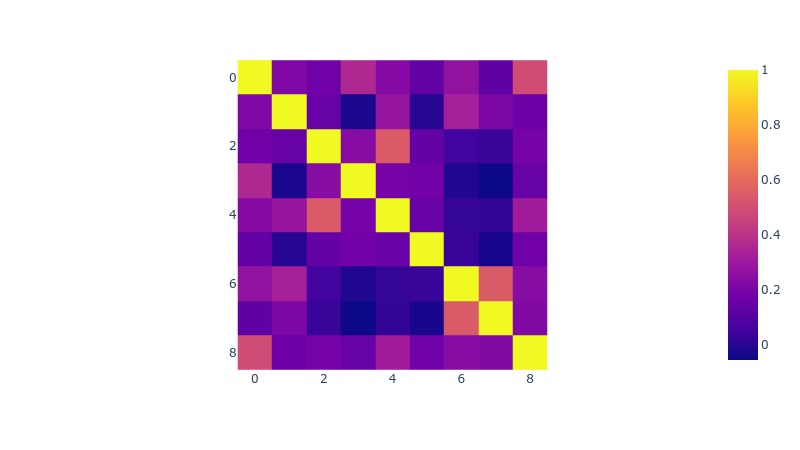

In [254]:
fig.show()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`MlX9tv$x9^+8hq@.?!W">fig</variable></variables><block type="varDoMethod" id="Y3*:nG98oP04XKV=JbYK" x="8" y="188"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></xml>

This is the color that represents zero: 

So anything darker is a negative correlation, and anything lighter is a positive one.
As you can see, most of the negative correlations are weak and so not very interesting. 
The most positive correlations are pink-orange at around .55, which is a medium correlation.

### Histograms

Another way to try to understand the data is to create histograms of all the variables.
As we briefly discussed, a histogram shows you the count (on the y-axis) of the number of data points that fall into a certain range (also called a bin) of the variable.

It can be very tedious to make a separate plot for each variable when you have many variables.
The best way is to do it in a loop:

- `for each item i in list` `from dataframe get columns` (use the green loop)
    - Set `fig` to `with px do histogram using` a list containing
        - `dataframe`
        - `x=` followed by `i`  **Hint**:  
    - Empty freestyle  followed by `with fig do show using` 

**Hint**: 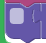

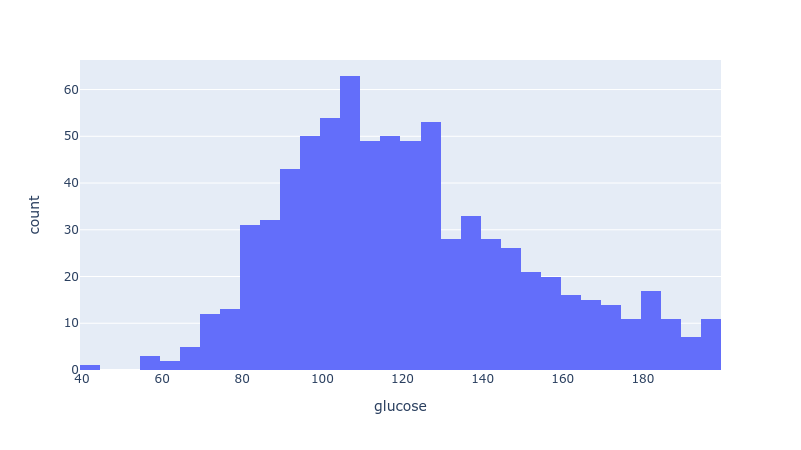

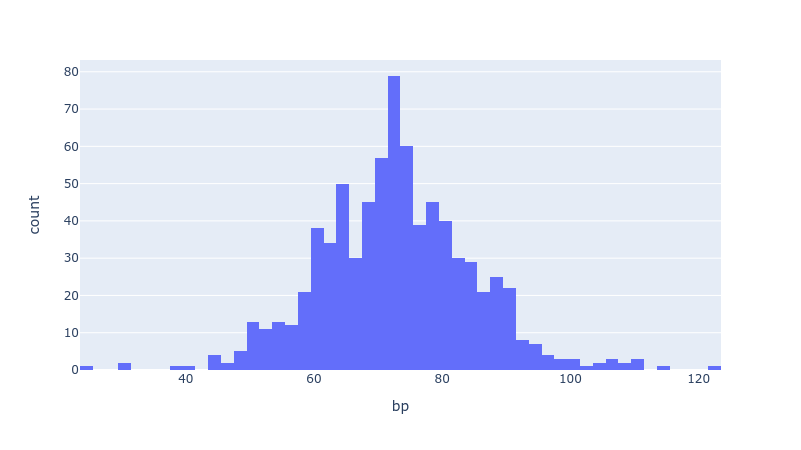

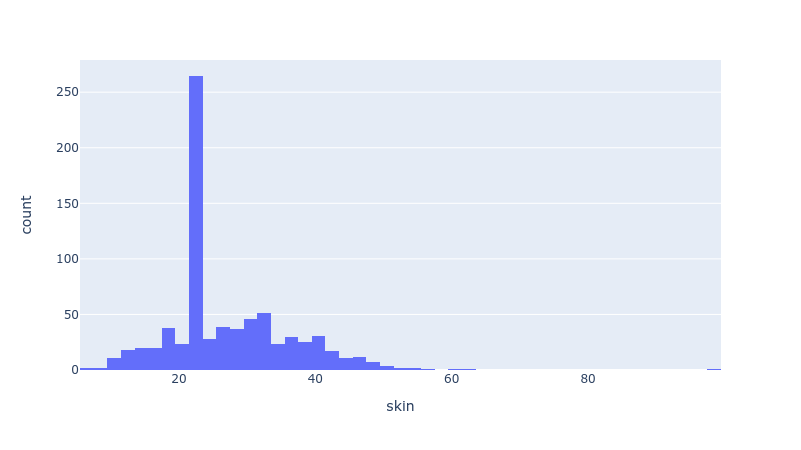

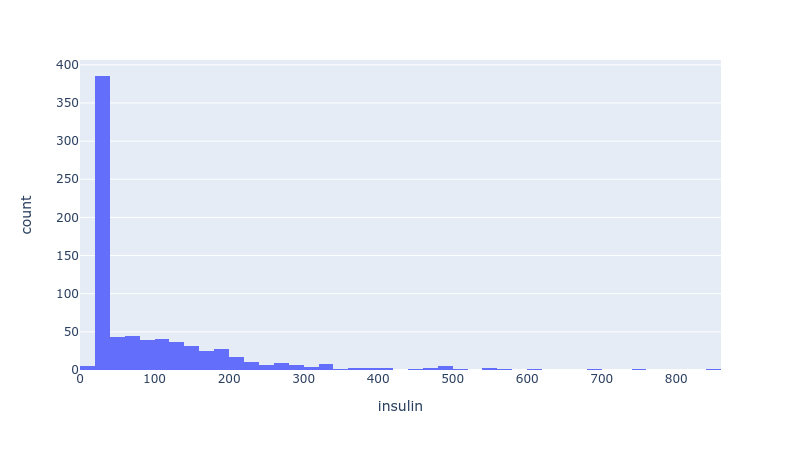

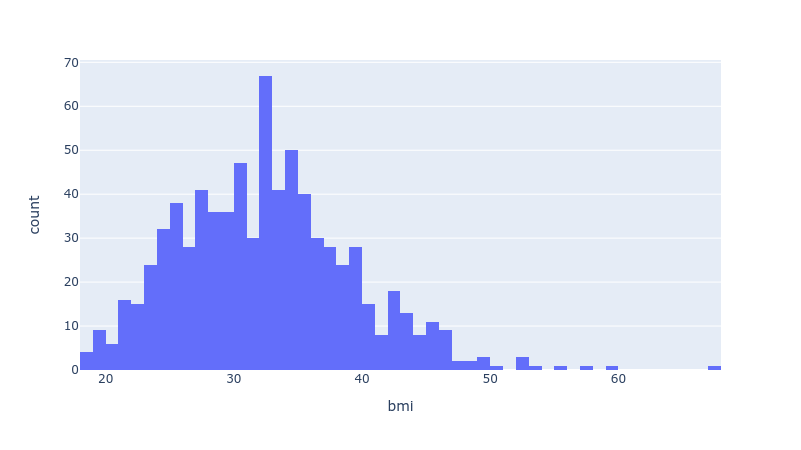

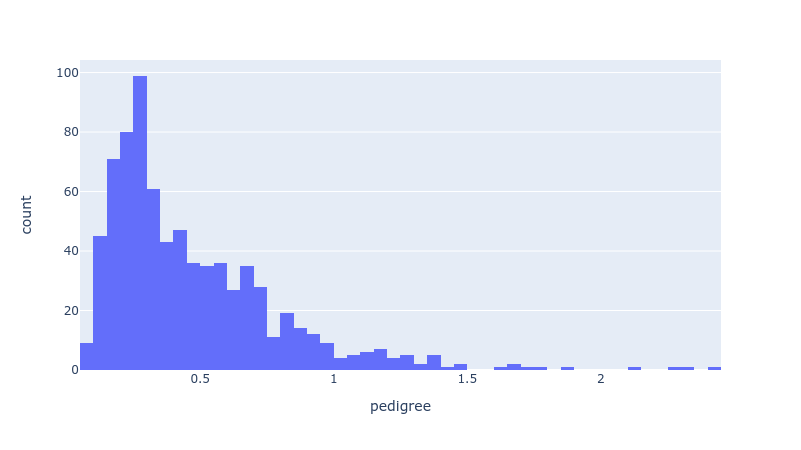

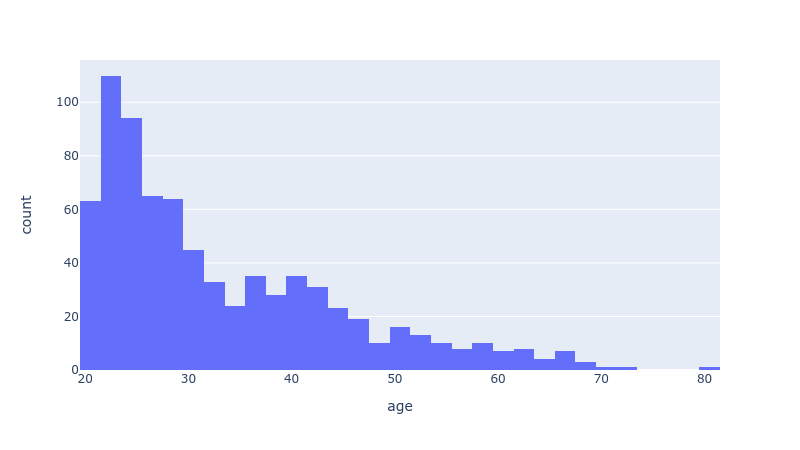

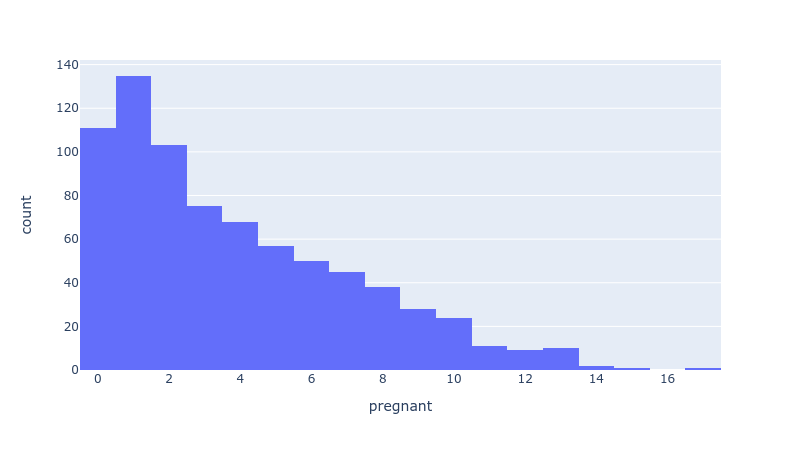

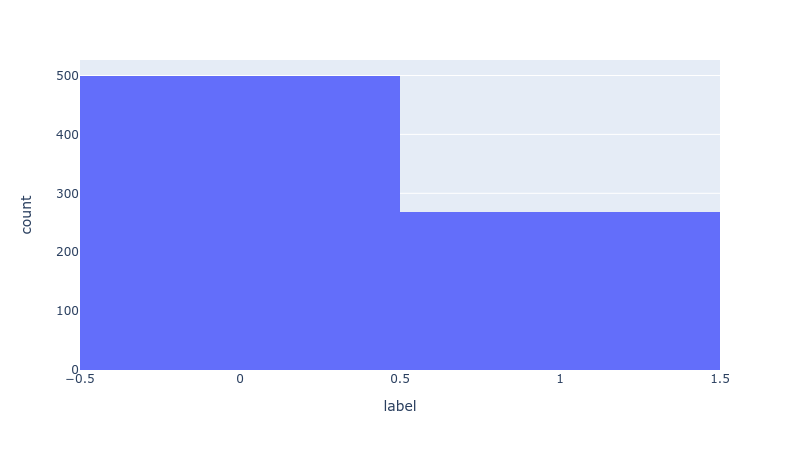

In [255]:
for i in dataframe.columns:
  fig = px.histogram(dataframe, x= i)
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="V_64Ged:C0QJ|TmiRhMz">i</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable><variable id="`MlX9tv$x9^+8hq@.?!W">fig</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable></variables><block type="controls_forEach" id="V.xPfOE~[Ux~30j}0jWn" x="36" y="368"><field name="VAR" id="V_64Ged:C0QJ|TmiRhMz">i</field><value name="LIST"><block type="varGetProperty" id="_VPma6},3p|%M53-|svb"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">columns</field><data>dataframe:columns</data></block></value><statement name="DO"><block type="variables_set" id="?as/WNxbs`xuAo6s]WCS"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><value name="VALUE"><block type="varDoMethod" id="M7Nr}Mv.DAk?=8Xv:VTh"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="INPUT"><block type="lists_create_with" id="JD%Ihlvfj~M#!M@}qUh7"><mutation items="2"></mutation><value name="ADD0"><block type="variables_get" id="HERwNg=OfTm0rFH2lO!*"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field></block></value><value name="ADD1"><block type="valueOutputCodeBlock" id="uJ?DS:J9fu7,X*mfzq]c"><field name="CODE">x=</field><value name="INPUT"><block type="variables_get" id="w`$;pxgH,LY$0t,5KW,A"><field name="VAR" id="V_64Ged:C0QJ|TmiRhMz">i</field></block></value></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock" id="asH1JD|fAJXv!Q:$@Loh"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod" id="g`Mq4iX?/fkmp1qr+Q1/"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></statement></block></xml>

From these histograms we observe:
    
- Only `glucose`, `bp`, and `bmi` are normal
- Everything else has larger mass on the lower end of the scale (i.e. on the left)

## Prepare train/test sets

We need to split the dataframe into training data and testing data, and also separate the predictors from the class labels.

Let's start by dropping the label:

- Create variable `X`
- Set it to `with dataframe do drop using` a list containing
    - freestyle `columns=["label"]`
- `X` (to display)

In [256]:
X = dataframe.drop(columns=["label"])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="j12HEn?u}2$P-S)Ax6d(" x="-16" y="265"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field><value name="VALUE"><block type="varDoMethod" id="PMH^/O2y?rD(Y}r-N6eY"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="bGn#S3b1DV-0-egwl87D"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="8N-YF(7ms%)oox.~Z;b/"><field name="CODE">columns=["label"]</field></block></value></block></value></block></value></block><block type="variables_get" id="*Q(nsPMh9xg`HceqC3eN" x="-11" y="350"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></xml>

,glucose,bp,skin,insulin,bmi,pedigree,age,pregnant
9,148.0,72.0,35.0,30.5,33.599998,0.627,50.0,6.0
10,85.0,66.0,29.0,30.5,26.600000,0.351,31.0,1.0
11,183.0,64.0,23.0,30.5,23.299999,0.672,32.0,8.0
12,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,1.0
13,137.0,40.0,35.0,168.0,43.099998,2.288,33.0,0.0
...,...,...,...,...,...,...,...,...
772,101.0,76.0,48.0,180.0,32.900002,0.171,63.0,10.0
773,122.0,70.0,27.0,30.5,36.799999,0.340,27.0,2.0
774,121.0,72.0,23.0,112.0,26.200001,0.245,30.0,5.0
775,126.0,60.0,23.0,30.5,30.100000,0.349,47.0,1.0


Save a dataframe with just `label` in `Y`:

- Create variable `Y`
- Set it to `dataframe [ ] ` containing the following in a list
    - `"label"`
- `Y` (to display)

In [257]:
Y = dataframe[['label']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable><variable id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</variable></variables><block type="variables_set" id="_:J1([xryT4i+F7k{#[%" x="17" y="175"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field><value name="VALUE"><block type="indexer" id="22hOF=T:mHvJrMybHkPs"><field name="VAR" id="-(zD`=)|+6ZJe1eZ)t2_">dataframe</field><value name="INDEX"><block type="lists_create_with" id="qT2G_{7q~*L;[5j:vtKq"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="=UVLwuCW$1d9ZJ]6HF_,"><field name="TEXT">label</field></block></value></block></value></block></value></block><block type="variables_get" id="pog__n6Jf{VK_sNEB)B$" x="17" y="239"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></xml>

,label
9,1.0
10,0.0
11,1.0
12,0.0
13,1.0
...,...
772,0.0
773,0.0
774,0.0
775,1.0


To split our `X` and `Y` into train and test sets, we need an import:

- `import sklean.model_selection as model_selection`

In [258]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits:

- Create variable `splits`
- Set it to `with model_selection do train_test_split using` a list containing
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `test_size=0.2` (the proportion of the dataset to include in the test split)

In [259]:
splits = model_selection.train_test_split(X, Y, test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="Eu6+HM0^Zfw6=$49Xgk7">X</variable><variable id="vEy06PN?Djk]8Ag?;UWi">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="Eu6+HM0^Zfw6=$49Xgk7">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="vEy06PN?Djk]8Ag?;UWi">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></value></block></xml>

## Logistic regression model

We need to import libraries for:

- Logistic regression
- Metrics
- Ravel

As well as libraries we need to standardize:

- Scale
- Pipeline

So do the following imports:

- `import sklearn.linear_model as linear_model`
- `import sklearn.metrics as metrics`
- ~~`import numpy as np`~~ (already imported above)
- `import sklearn.preprocessing as pp`
- `import sklearn.pipeline as pipe`

In [260]:
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.preprocessing as pp
import sklearn.pipeline as pipe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable></variables><block type="importAs" id="C,|uKYZ4CH*/,cD|4($8" x="135" y="303"><field name="libraryName">sklearn.linear_model</field><field name="libraryAlias" id="cGnMvhq5543q[r$:Og-x">linear_model</field><next><block type="importAs" id="*G_SVgZ;}hIr,Hi1~$Z6"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><next><block type="importAs" id="/YAkt4vqDQp/.5;pPcY."><field name="libraryName">sklearn.preprocessing</field><field name="libraryAlias" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><next><block type="importAs" id="O15G]dI#1oM;`7^r@Pr,"><field name="libraryName">sklearn.pipeline</field><field name="libraryAlias" id="=z9KfSBWpoDS,oj-?yx,">pipe</field></block></next></block></next></block></next></block></xml>

We're going to make a pipeline so we can scale and train in one step:

- Create variable `std_clf`
- Set it to `with pipe do make_pipeline using` a list containing
    - `with pp create StandardScaler using`
    - `with linear_model create LogisticRegression using` 

In [261]:
std_clf = pipe.make_pipeline(pp.StandardScaler(), linear_model.LogisticRegression())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="cGnMvhq5543q[r$:Og-x">linear_model</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="77" y="398"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod" id="(Noh/e~gvTM3-4|;g]s["><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="INPUT"><block type="lists_create_with" id="(Q-}ch^M{g#1!2LN+l,@"><mutation items="2"></mutation><value name="ADD0"><block type="varCreateObject" id="e9G_EPu`q{*0`$!~:jh~"><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject" id="ar7keIh-Yv)+b+#Edsp_"><field name="VAR" id="cGnMvhq5543q[r$:Og-x">linear_model</field><field name="MEMBER">LogisticRegression</field><data>linear_model:LogisticRegression</data></block></value></block></value></block></value></block></xml>

We can treat the whole pipeline as a classifier and call `fit` on it:

-  `with std_clf do fit using` a list containing
    - `in list splits get # 1` (this is Xtrain)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (this is Ytrain)

In [262]:
std_clf.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Now we can get predictions from the model for our test data:

- Create variable `predictions`
- Set it to `with std_clf do predict using` a list containing
    - `in list splits get # 2` (this is Xtest)
- `predictions` (to display)


In [263]:
predictions = std_clf.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict</field><data>std_clf:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="I#4y[,+*#I5s;b;h3o/M" x="75" y="307"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></xml>

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1.], dtype=float32)

## Assessing the model

To get the accuracy:

- `print create text with`
    - "Accuracy:"
    - `with metrics do accuracy_score using` a list containing
        - `in list splits get # 4`  (this is `Ytest`)
        - `predictions`

In [264]:
print('Accuracy:' + str(metrics.accuracy_score(splits[3], predictions)))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="6KCf/4(JectOv*aO[L6d" x="67" y="-410"><value name="TEXT"><shadow type="text" id=",J]%.V~I;qhep.pWfj3L"><field name="TEXT">abc</field></shadow><block type="text_join" id="|l|?2Yb#{m=ys_V^)+v-"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="8MdDU0D^rCAqKltb#kaY"><field name="TEXT">Accuracy:</field></block></value><value name="ADD1"><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">accuracy_score</field><data>predictions:</data><value name="INPUT"><block type="lists_create_with" id="b;$i*:lxuE^`xvk}OQ4m"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="bFo^*si#t6gt7l@W:;ux"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9d/lD-+8|63uHF/H1dwi"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="o@Z:jn.60#6-_fkDivxs"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="GjWcPkckr7_}|j]O[Em+"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></value></block></xml>

Accuracy:0.7922077922077922


To get precision, recall, and F1:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

In [265]:
print(metrics.classification_report(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="(`;mrW|63Vww]$wlV9+1">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="text_print" id="w?Z]Mpw]G,uTA;S:C5Ef" x="27" y="-195"><value name="TEXT"><shadow type="text" id="j5J:iees]K0Kn%J)=1[1"><field name="TEXT">abc</field></shadow><block type="varDoMethod" id="p`ehX8lLN?zayQ1Ip=}V"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">classification_report</field><data>metrics:classification_report</data><value name="INPUT"><block type="lists_create_with" id="b;$i*:lxuE^`xvk}OQ4m"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="bFo^*si#t6gt7l@W:;ux"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="9d/lD-+8|63uHF/H1dwi"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="o@Z:jn.60#6-_fkDivxs"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="GjWcPkckr7_}|j]O[Em+"><field name="VAR" id="(`;mrW|63Vww]$wlV9+1">predictions</field></block></value></block></value></block></value></block></xml>

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       100
         1.0       0.72      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



Notice how the recall is much lower for `1` (diabetes), the rare class.

Finally, let's create an ROC plot. 
First we need the probabilities of the positive class, `1`:

- Create variable `probs`
- Set it to `with std_clf do predict_proba using` a list containing
    - `in list splits get # 2` (this is Xtest)
- Create variable `rocMetrics`
- Set it to `with metrics do roc_curve using` a list containing
    - `in list splits get # 4` (this is Ytest)
    - freestyle `probs[:,1]` (this is the positive class probabilities)
- Set `fig` to `with px do line using` a list containing
    - freestyle `x=rocMetrics[0]`
    - freestyle `y=rocMetrics[1]`
- `with fig do update_yaxes using` a list containing
    - freestyle `title_text="Recall/True positive rate"`
- `with fig do update_xaxes using` a list containing
    - freestyle `title_text="False positive rate"`
    
<!-- NOTE: Vasile had a nice AUC annotation on the plot, but I ran out of time to reverse engineer that -->

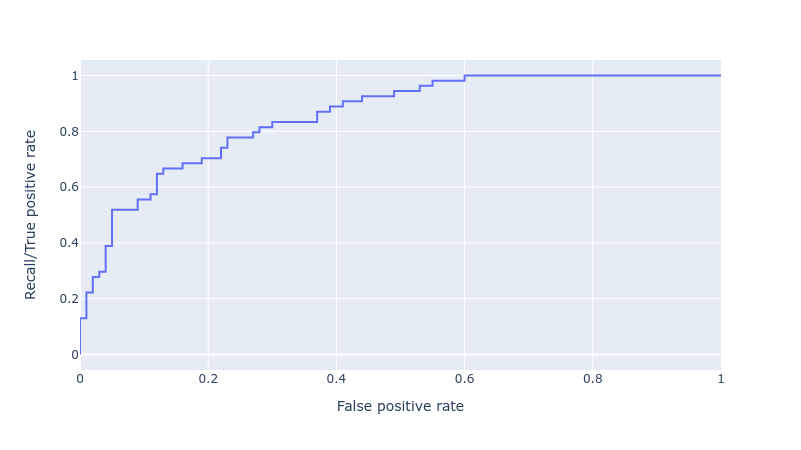

In [267]:
probs = std_clf.predict_proba(splits[1])
rocMetrics = metrics.roc_curve(splits[3], probs[:,1])
fig = px.line(x=rocMetrics[0], y=rocMetrics[1])

fig.update_yaxes(title_text="Recall/True positive rate")

fig.update_xaxes(title_text="False positive rate")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M}t8Cm4jpy8CZc{YnXy3">probs</variable><variable id="`MlX9tv$x9^+8hq@.?!W">fig</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id=",,t`1|+/`aO88;3vt8ZU">rocMetrics</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="+yh,Zg{hON]zy6D~.rH#">px</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="M}t8Cm4jpy8CZc{YnXy3">probs</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict_proba</field><data>std_clf:predict_proba</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="}4kjlvw)%T2:Y,TuO$1k"><field name="VAR" id=",,t`1|+/`aO88;3vt8ZU">rocMetrics</field><value name="VALUE"><block type="varDoMethod" id="St}]W`i!e!OdZl|3qj)#"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">roc_curve</field><data>metrics:roc_curve</data><value name="INPUT"><block type="lists_create_with" id="cZ56CQZr95f)2[OP#h-9"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="}~bW=uGu5bwR72v;A4Cx"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Q|/,RoTQ:TGE}q68/W7b"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="yoYX)i~8,,)(u:7zfo*h"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="7XMkWCE@tnPK}_Bi!M(("><field name="CODE">probs[:,1]</field></block></value></block></value></block></value><next><block type="variables_set" id="0/UMi`0+3{3*hHWkTDP%"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><value name="VALUE"><block type="varDoMethod" id="_#Q.pqcS0(zyB~^yEE.a"><field name="VAR" id="+yh,Zg{hON]zy6D~.rH#">px</field><field name="MEMBER">line</field><data>px:line</data><value name="INPUT"><block type="lists_create_with" id="OC-;VKVNf@v,4Vh/L=/5"><mutation items="2"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="1H4P3K^L01dS/g-VDy6M"><field name="CODE">x=rocMetrics[0]</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="V!iDI^[cIrybrEGiltvm"><field name="CODE">y=rocMetrics[1]</field></block></value></block></value></block></value></block></next></block></next></block><block type="varDoMethod" id="?[FeD.F=+5w?b%v4~QMN" x="74" y="432"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><field name="MEMBER">update_yaxes</field><data>fig:update_yaxes</data><value name="INPUT"><block type="dummyOutputCodeBlock" id="lM7[K0n*qO+Kz)j*~888"><field name="CODE">title_text="Recall/True positive rate"</field></block></value></block><block type="varDoMethod" id="bQR3M#?N-_JszSa)[H^V" x="85" y="487"><field name="VAR" id="`MlX9tv$x9^+8hq@.?!W">fig</field><field name="MEMBER">update_xaxes</field><data>fig:update_xaxes</data><value name="INPUT"><block type="dummyOutputCodeBlock" id="-BM+X)VB?t#|LHtZ;cYy"><field name="CODE">title_text="False positive rate"</field></block></value></block></xml>

## Submit your work

When you have finished the notebook, please download it, log in to [OKpy](https://okpy.org/) using "Student Login", and submit it there.

Then let your instructor know on Slack.
